In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [8]:
# Load the data
training_data = pd.read_csv('Data/training.csv')
training_data.drop("Unnamed: 0", axis=1, inplace=True)

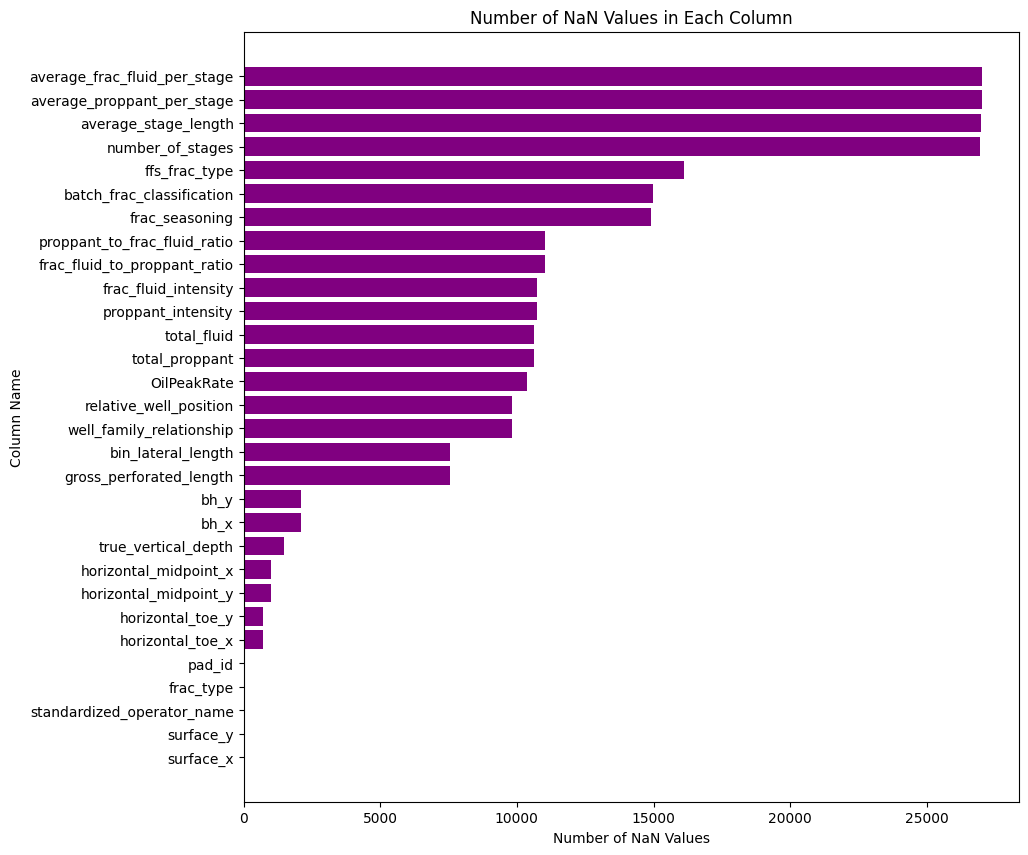

In [13]:
# Convert any "Undefined" or "Unknown" values to NaN
training_data.replace('Undefined', np.nan, inplace=True)
training_data.replace('Unknown', np.nan, inplace=True)

# Make a histogram of the NaN values for each column, and sort by number of NaN values
# Sort by number of NaN values
training_data = training_data[training_data.isna().sum().sort_values(ascending=True).index]

plt.figure(figsize=(10, 10))
plt.barh(training_data.columns, training_data.isna().sum(), color='purple')
plt.title('Number of NaN Values in Each Column')
plt.xlabel('Number of NaN Values')
plt.ylabel('Column Name')
plt.show()

In [14]:
training_data = pd.read_csv('Data/training.csv')
drop_columns = ['Unnamed: 0', 'pad_id', 'standardized_operator_name', 'average_stage_length', 'average_proppant_per_stage', 'average_frac_fluid_per_stage', 'number_of_stages', 'frac_type']
training_data.drop(columns=drop_columns, inplace=True)
training_data.drop_duplicates(inplace=True)
training_data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Convert any "Undefined" or "Unknown" values to NaN
training_data.replace('Undefined', np.nan, inplace=True)
training_data.replace('Unknown', np.nan, inplace=True)

# Before imputing, keep track of rows with missing values for 'OilPeakRate' to remove them later
rows_with_missing_values = training_data[training_data['OilPeakRate'].isnull()].index.to_list()

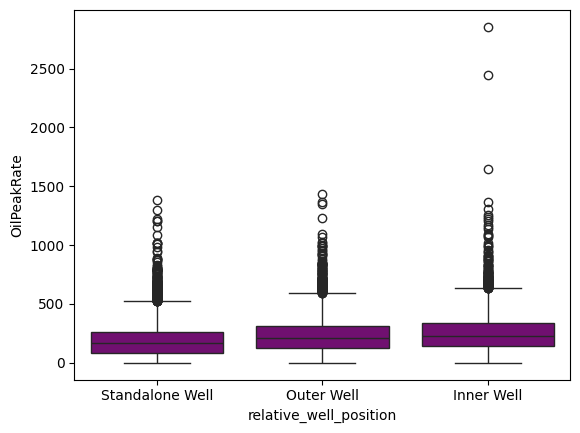

In [21]:
sns.boxplot(x=training_data["relative_well_position"], y=training_data["OilPeakRate"], color='purple')
plt.show()

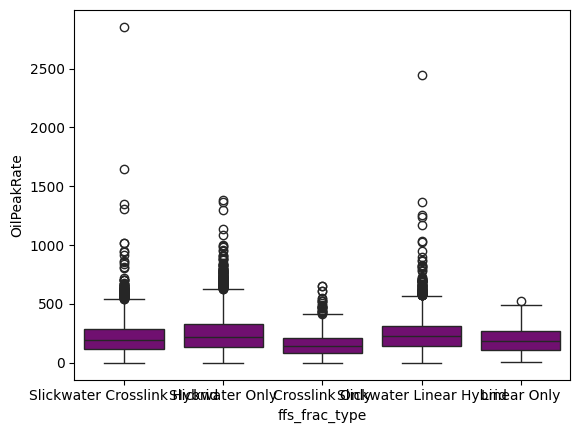

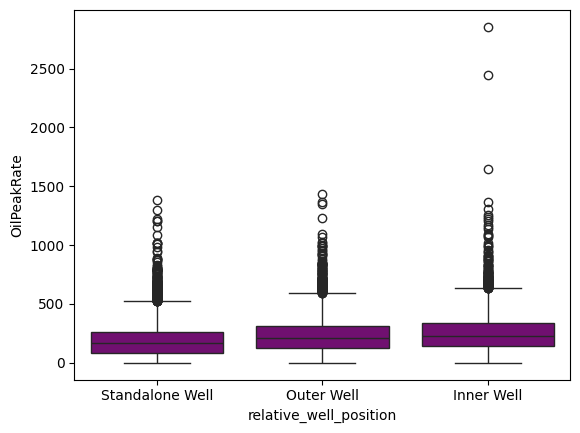

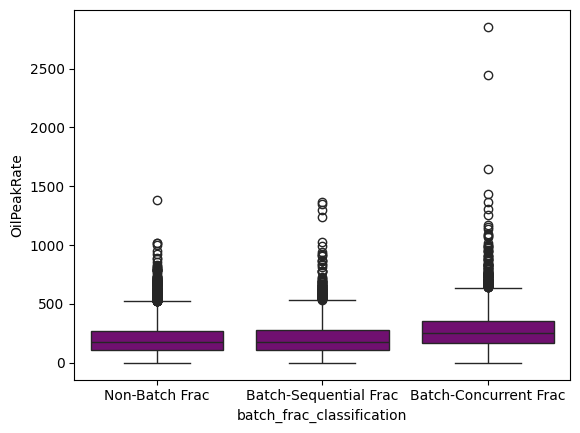

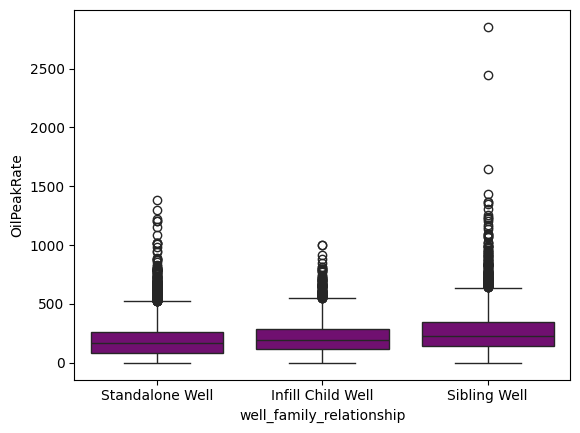

In [29]:
# Make a boxplots for each categorical feature
# Ensure that text is rotated so that it is readable
categorical_columns = ['ffs_frac_type', 'relative_well_position', 'batch_frac_classification', 'well_family_relationship']
for column in categorical_columns:
    sns.boxplot(x=training_data[column], y=training_data["OilPeakRate"], color='purple')
    plt.show()